# Home Credit Default Risk

Création d'un modèle de machine learning qui doit etre capable de prédire si oui ou non un couple peut avoir droit à un pret immobilier.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import seaborn as sns
%matplotlib inline

# DATA LOADING

In [2]:
data=pd.read_csv("C:\\Users\\Hassan\\Documents\\Hassan - EFREI\\Semestre 9\\APPLICATION OF BIG DATA\\application_train.csv", sep = ',')
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape#taille de mon dataset

(307511, 122)

In [4]:
data['TARGET'].unique()

array([1, 0], dtype=int64)

In [5]:
#we drop columns with more than 65% missing values
def drop_60(df):
    nb_na=df.isna().sum()/df.shape[0]
    v=nb_na[nb_na>0.65]
    l=[i for i in v.index]
    data1=df.drop(l,axis=1)
    return data1

In [6]:
data=drop_60(data)

In [7]:
data.shape

(307511, 105)

In [8]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [9]:
data.dtypes.value_counts()#The differents types in my dataframes

float64    49
int64      41
object     15
dtype: int64

In [10]:
def check_na(feature):
    count=0
    list=[]
    for el in feature:
        if data[el].isna().sum()>0:
            list.append(el)
            count+=1
    print(data[list].isna().sum())
    print("{} columns with missing values".format(count))


In [11]:
categorical=[var for var in data.columns if data[var].dtypes=='object']
categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [12]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
float_=[var for var in data.columns if data[var].dtypes=='float64']


In [14]:
int_=[var for var in data.columns if data[var].dtypes=='int64']
int_

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [15]:
data['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [16]:
data['Age']=data['DAYS_BIRTH']/(-365)
data['Age'].value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
28.197260    40
             ..
68.416438     1
68.942466     1
21.408219     1
68.808219     1
68.580822     1
Name: Age, Length: 17460, dtype: int64

In [17]:
data['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [18]:
data['YEAR_EMPLOYED']=data['DAYS_EMPLOYED']/(-365)
data['YEAR_EMPLOYED'].value_counts()


-1000.665753    55374
 0.547945         156
 0.613699         152
 0.630137         151
 0.545205         151
                ...  
 27.465753          1
 38.758904          1
 32.326027          1
 32.400000          1
 30.619178          1
Name: YEAR_EMPLOYED, Length: 12574, dtype: int64

In [19]:
#Number of missing value in categorical columns
check_na(categorical)

NAME_TYPE_SUITE          1292
OCCUPATION_TYPE         96391
HOUSETYPE_MODE         154297
WALLSMATERIAL_MODE     156341
EMERGENCYSTATE_MODE    145755
dtype: int64
5 columns with missing values


In [20]:
data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [21]:
data[categorical]=data[categorical].fillna("Unknown"+data[categorical])

In [22]:
check_na(categorical)

NAME_TYPE_SUITE          1292
OCCUPATION_TYPE         96391
HOUSETYPE_MODE         154297
WALLSMATERIAL_MODE     156341
EMERGENCYSTATE_MODE    145755
dtype: int64
5 columns with missing values


In [23]:
check_na(float_)

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
LANDAREA_AVG                    182590
LIVINGAREA_AVG                  154350
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
ELEVATORS_MODE                  163891
ENTRANCES_MODE                  154828
FLOORSMAX_MODE                  153020
LANDAREA_MODE                   182590
LIVINGAREA_MODE                 154350
NONLIVINGAREA_MODE              169682
APARTMENTS_MEDI                 156061
BASEMENTAREA_MEDI        

In [24]:
data[float_]= data[float_].fillna(data[float_].mean())

In [25]:
check_na(int_)

Series([], dtype: float64)
0 columns with missing values


In [26]:
data=data.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis=1)

In [27]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,YEAR_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,54.608219,8.323288


In [28]:
data.shape

(307511, 105)

In [29]:
cmap=abs(data.corr()['TARGET']).tail(10)
cmap

FLAG_DOCUMENT_20              0.000215
FLAG_DOCUMENT_21              0.003709
AMT_REQ_CREDIT_BUREAU_HOUR    0.000848
AMT_REQ_CREDIT_BUREAU_DAY     0.002464
AMT_REQ_CREDIT_BUREAU_WEEK    0.000718
AMT_REQ_CREDIT_BUREAU_MON     0.011356
AMT_REQ_CREDIT_BUREAU_QRT     0.001842
AMT_REQ_CREDIT_BUREAU_YEAR    0.018160
Age                           0.078239
YEAR_EMPLOYED                 0.044932
Name: TARGET, dtype: float64

In [30]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,YEAR_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,54.608219,8.323288


C:\Users\Hassan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of observations')

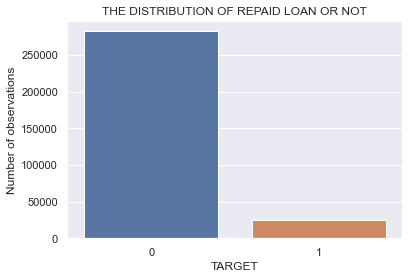

In [31]:
sns.set(style="darkgrid")
x=data['TARGET'].value_counts()
sns.barplot(x.index,x.values,alpha=1)
plt.title('THE DISTRIBUTION OF REPAID LOAN OR NOT')
plt.xlabel('TARGET')
plt.ylabel('Number of observations')#most of the make loan have been repaid

In [32]:
data['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [33]:
x=data[data['TARGET']==0]#on essaie d'en apprendre d'avantages sur les personnes qui ont eu à rembourser leurs prets

In [34]:
target_0=pd.DataFrame(x)
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,YEAR_EMPLOYED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,54.608219,8.323288
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000,46.413699,4.350685


C:\Users\Hassan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of observations')

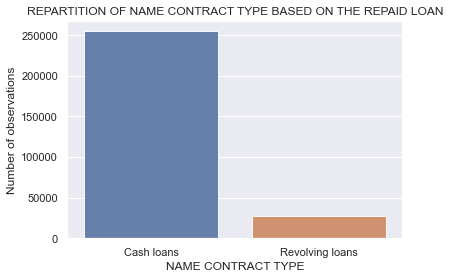

In [35]:


x=target_0['NAME_CONTRACT_TYPE'].value_counts()
sns.barplot(x.index,x.values,alpha=0.9)
plt.title('REPARTITION OF NAME CONTRACT TYPE BASED ON THE REPAID LOAN')
plt.xlabel('NAME CONTRACT TYPE')
plt.ylabel('Number of observations')#the majority of person who repaid their loan have done a cash loan(pret de tresorerie).it means that they already had enough money for their operations 

In [36]:
from bokeh.transform import cumsum
from bokeh.palettes import viridis
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.transform import dodge
from bokeh.palettes import Spectral9
from math import pi

In [37]:
target_0['CNT_FAM_MEMBERS'].value_counts()

2.000000     146348
1.000000      62172
3.000000      47993
4.000000      22561
5.000000       3151
6.000000        353
7.000000         75
8.000000         14
9.000000          6
2.152665          2
12.000000         2
20.000000         2
10.000000         2
16.000000         2
14.000000         2
15.000000         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [38]:
z=target_0[target_0['NAME_CONTRACT_TYPE']=='Cash loans']
target_1=pd.DataFrame(z)
y=target_1['OCCUPATION_TYPE'].value_counts().head(9)#to know the occupation type of person who repaid loan after take cash loan 


continent = ['Laborers','Sales staff','Core staff','Managers','Drivers','High skill tech staff','Accountants','Medicine staff','Security staff']
counts = target_1.OCCUPATION_TYPE.groupby(target_1.OCCUPATION_TYPE).value_counts().nlargest(10)[1:50000]

source = ColumnDataSource(data=dict(continent=continent, counts=y))

p = figure(x_range=continent, plot_width=1000, title="OCCUPATION TYPE OF PERSON WHO TAKE CASH LOAN FOR REPAIR THEIR LOAN",
           tools='hover',tooltips="@counts")

p.vbar(x='continent', top='counts', width=0.9, source=source, legend="continent",line_color='black', fill_color=factor_cmap('continent', palette=Spectral9, factors=continent))



p.y_range.start = 0
p.legend.location = "top_right"
p.legend.orientation = "horizontal"
show(p)

C:\Users\Hassan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of observations')

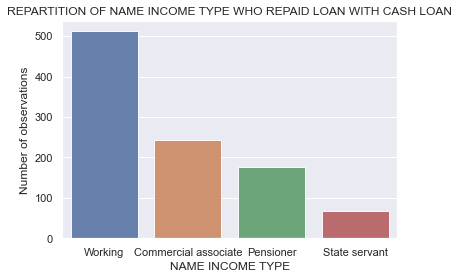

In [39]:
x=target_1['NAME_INCOME_TYPE'].head(1000).value_counts()
sns.barplot(x.index,x.values,alpha=0.9)
plt.title('REPARTITION OF NAME INCOME TYPE WHO REPAID LOAN WITH CASH LOAN')
plt.xlabel('NAME INCOME TYPE')
plt.ylabel('Number of observations')

Text(0, 0.5, 'Count')

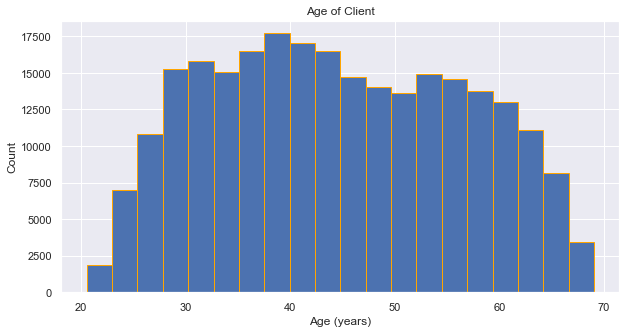

In [40]:
plt.figure(figsize=(10,5))#Age of persons who repairs their loan
plt.hist(target_1['Age'] , edgecolor = 'orange', bins = 20)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

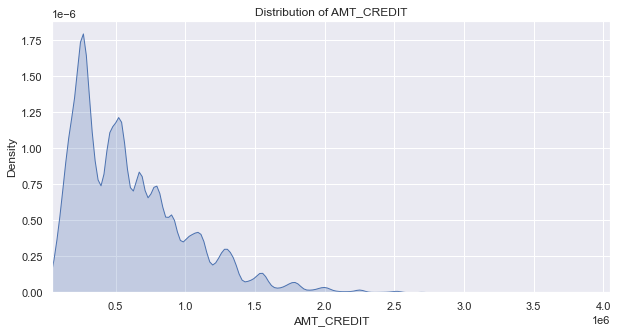

In [41]:
plt.figure(figsize=(10,5))
plt.xlim(data['AMT_CREDIT'].min(),data['AMT_CREDIT'].max())
plt.xlabel('AMT_CREDIT')
plt.ylabel('Density')
sns.kdeplot(data['AMT_CREDIT'],shade=True)
plt.title("Distribution of AMT_CREDIT")
plt.show()

C:\Users\Hassan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of observations')

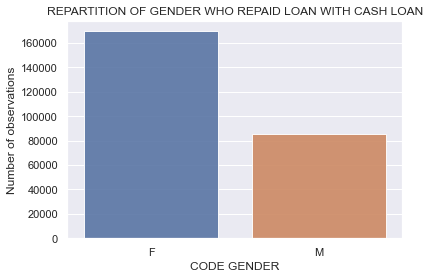

In [42]:
x=target_1['CODE_GENDER'].value_counts()
sns.barplot(x.index,x.values,alpha=0.9)
plt.title('REPARTITION OF GENDER WHO REPAID LOAN WITH CASH LOAN')
plt.xlabel('CODE GENDER')
plt.ylabel('Number of observations')#les femmes gagent lus que les hommes

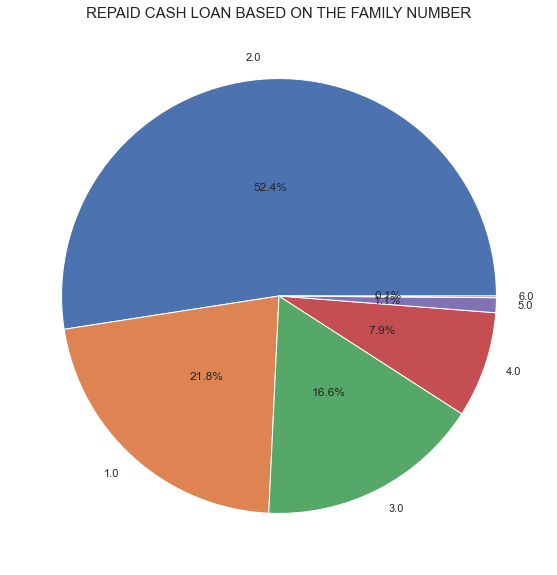

In [43]:
#les familles moins nombreuses(avec le moins d'enfants) ont donc plus de chance de rembourser leur credit
x=target_1['CNT_FAM_MEMBERS'].value_counts().head(6)
pie, ax = plt.subplots(figsize=[20,10])

plt.pie(x, autopct="%.1f%%", labels=x.index, pctdistance=0.5)
plt.title(" REPAID CASH LOAN BASED ON THE FAMILY NUMBER ", fontsize=15);
pie.savefig("DeliveryPieChart.png")

In [44]:
#on fera de meme pour name_contract_type=revolved loan puis on remonte a target==1 une prochaine fois

# FEATURE ENGINEERING

### We are firstly going to see our outliers among our numerical continuous columns

In [45]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,YEAR_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000,25.920548,1.745205
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,45.931507,3.254795
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,52.180822,0.616438
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974,52.068493,8.326027
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,54.608219,8.323288


In [46]:
numerical=[var for var in data.columns if data[var].dtypes!='object']
print("there are {} numericals columns".format(len(numerical)))

there are 90 numericals columns


In [47]:
continuous = []#we want to see the number of continous values columns
for var in numerical:
    if len(data[var].unique())>3:
        continuous.append(var)
        
print('There are {} continuous variables'.format(len(continuous)))

There are 55 continuous variables


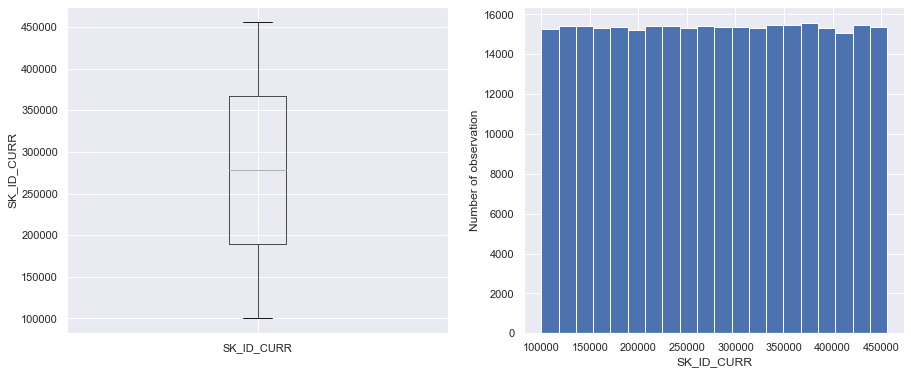

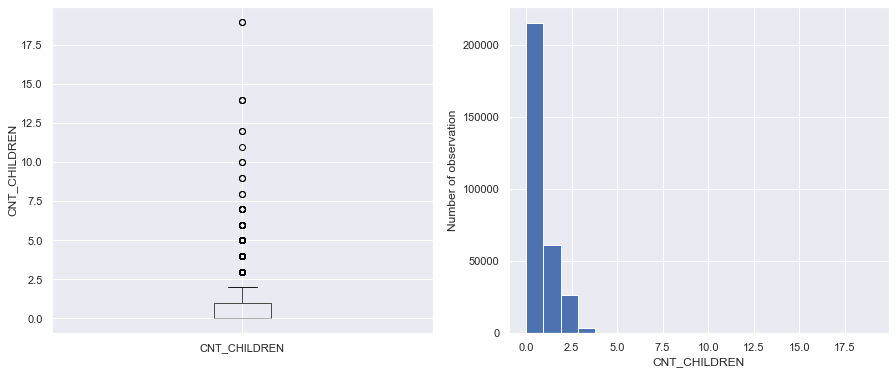

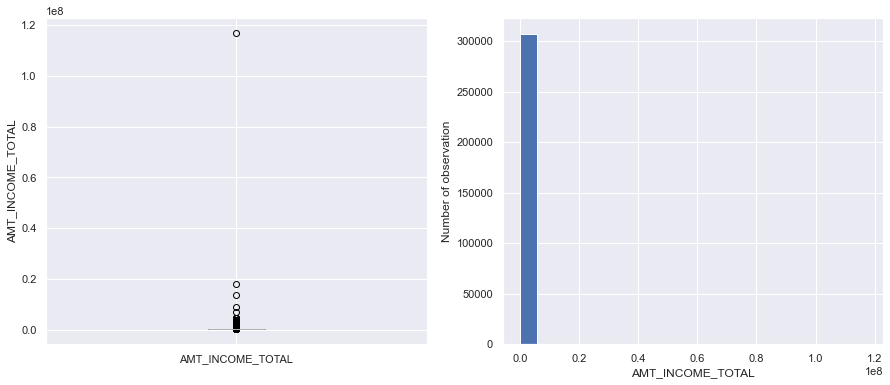

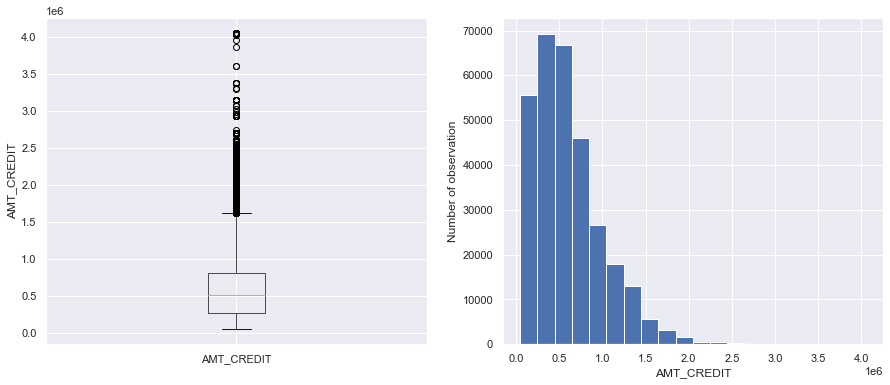

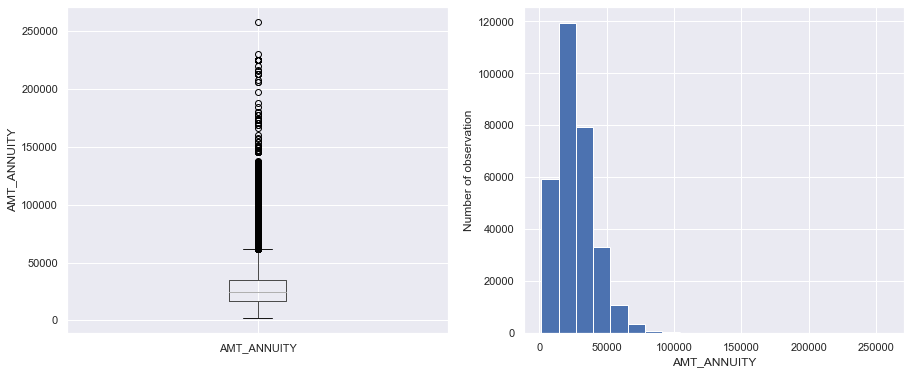

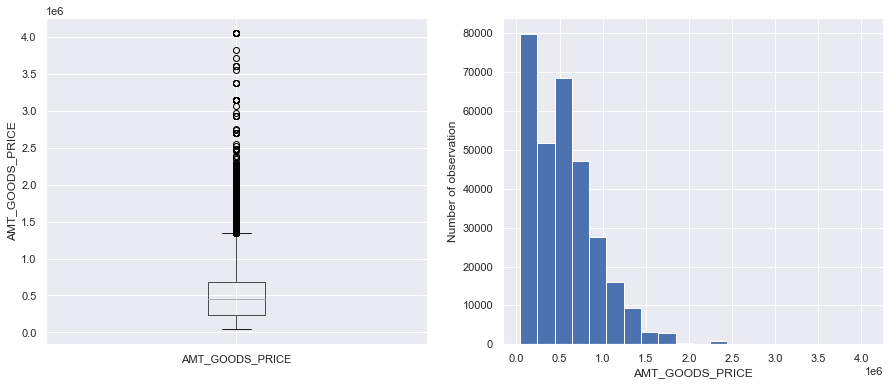

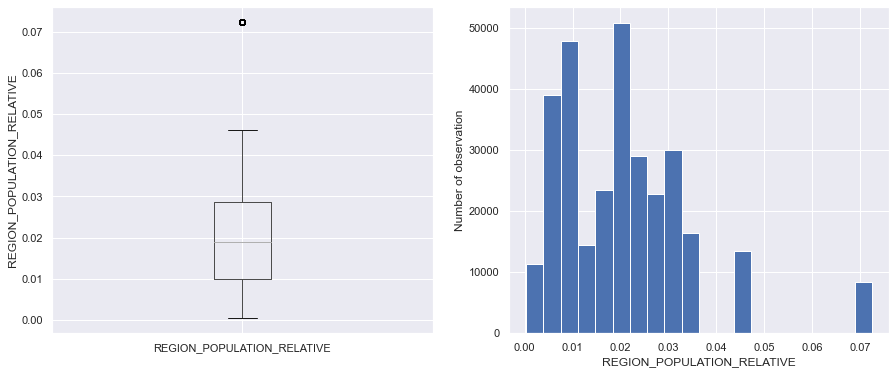

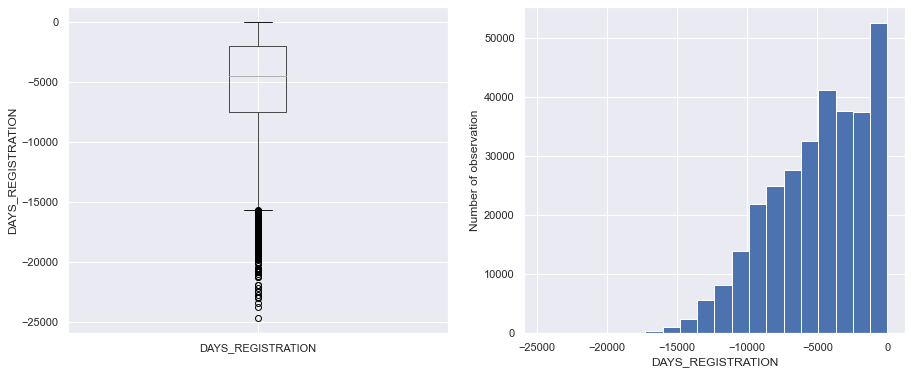

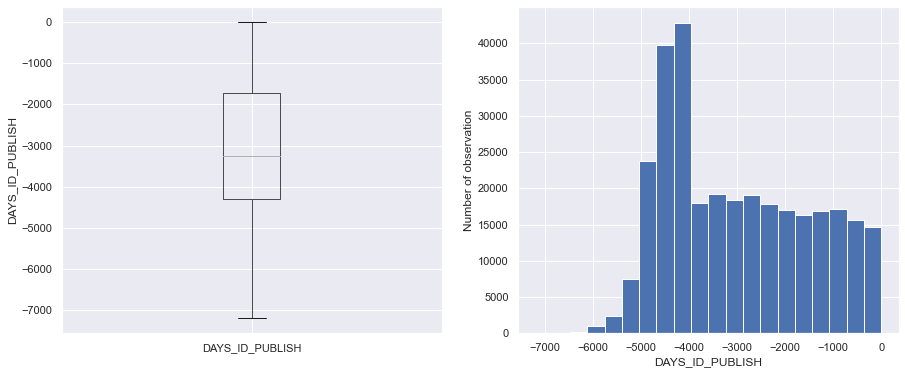

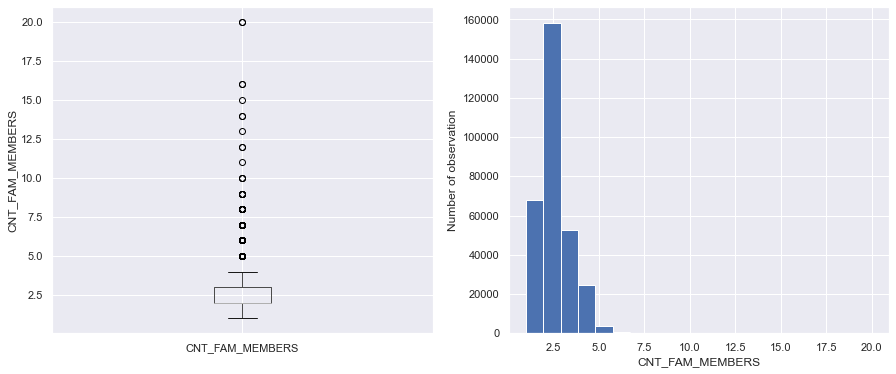

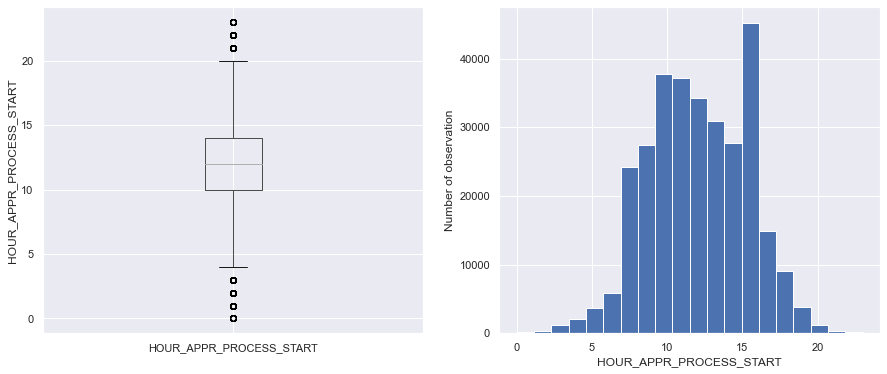

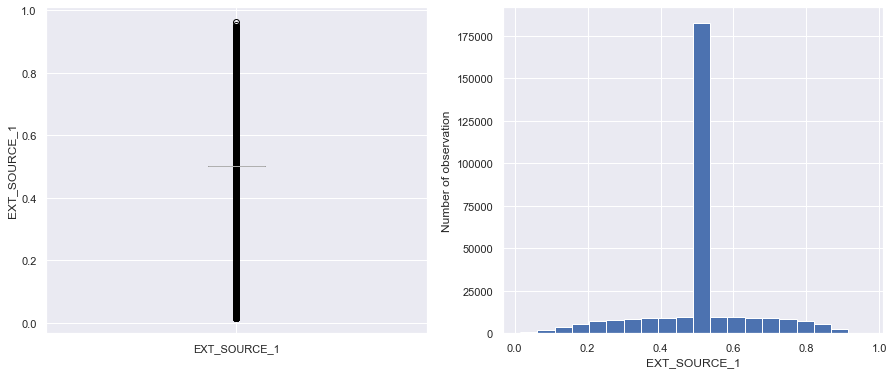

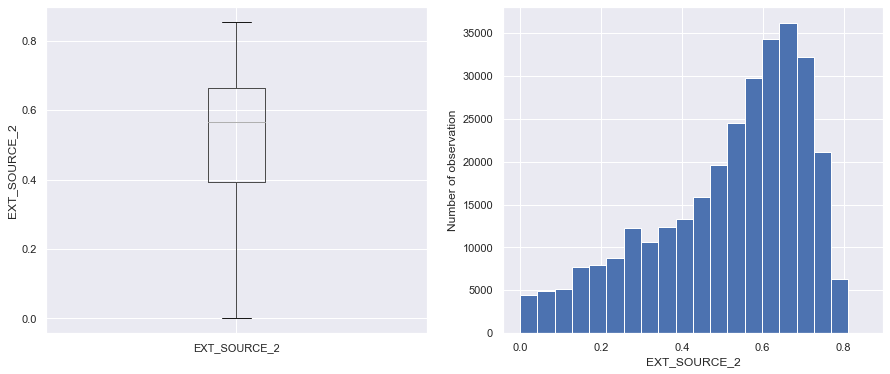

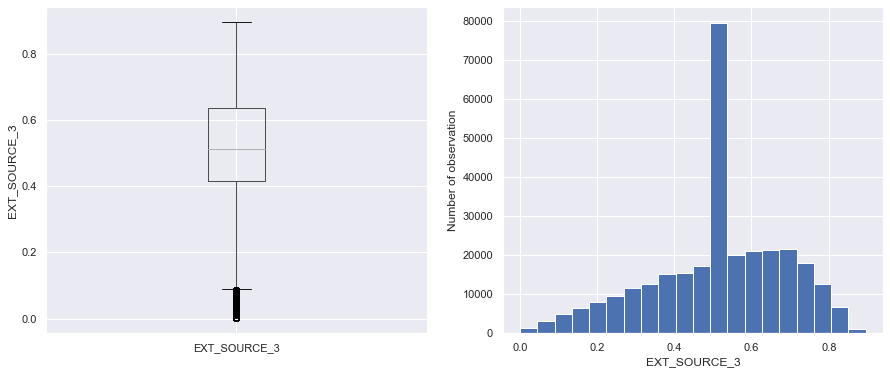

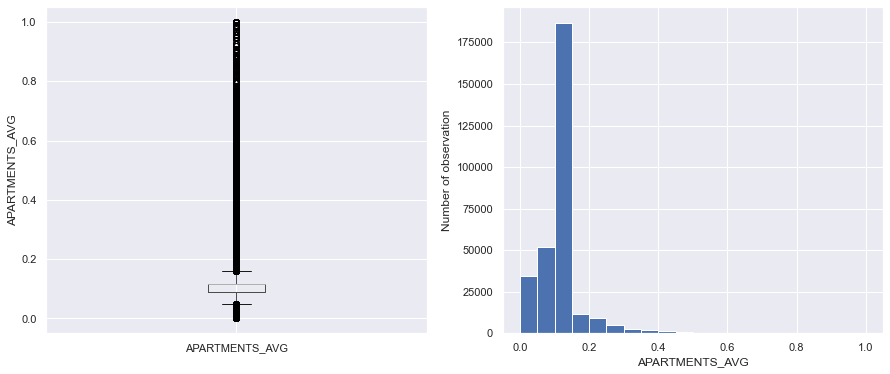

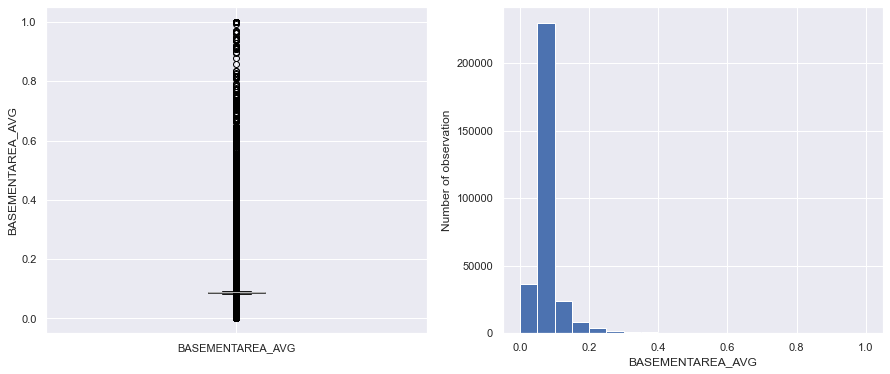

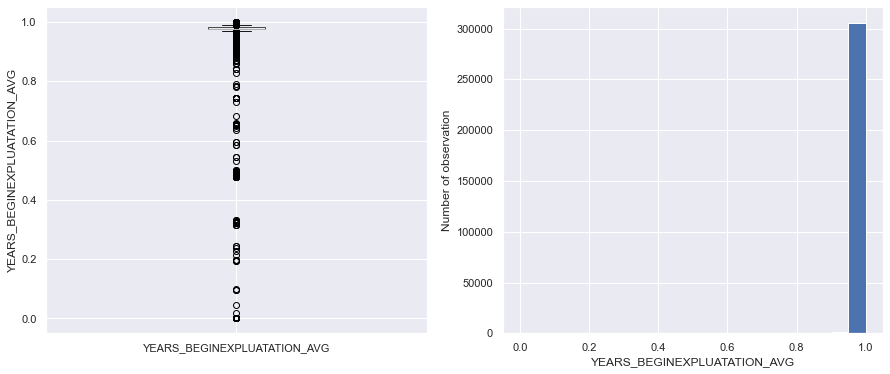

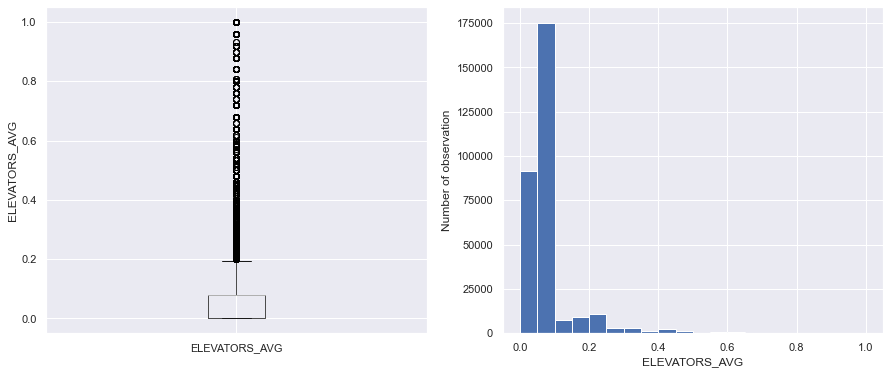

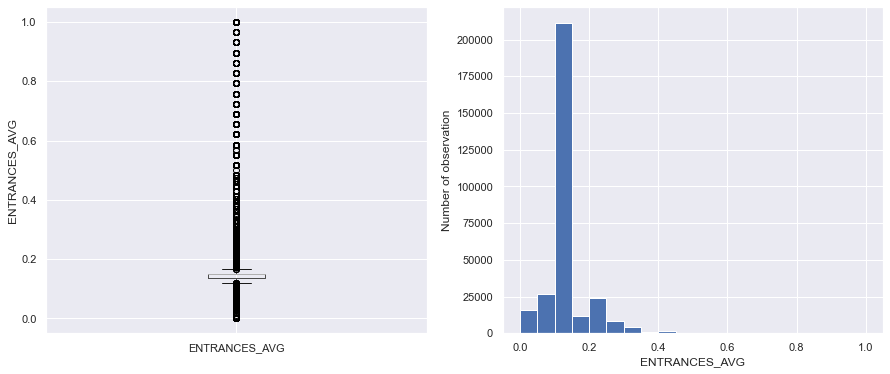

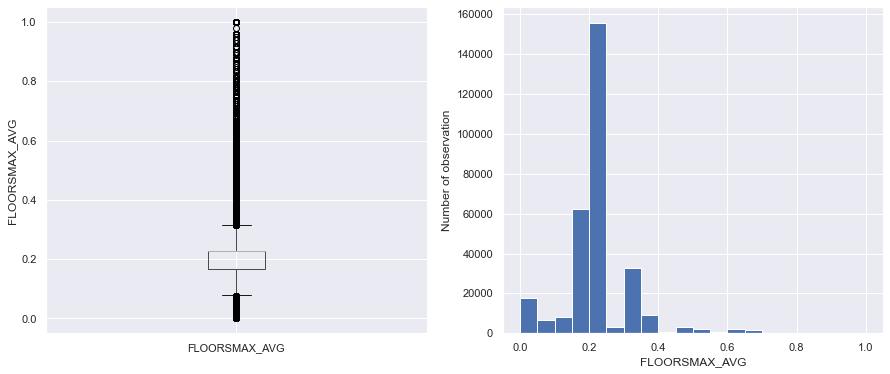

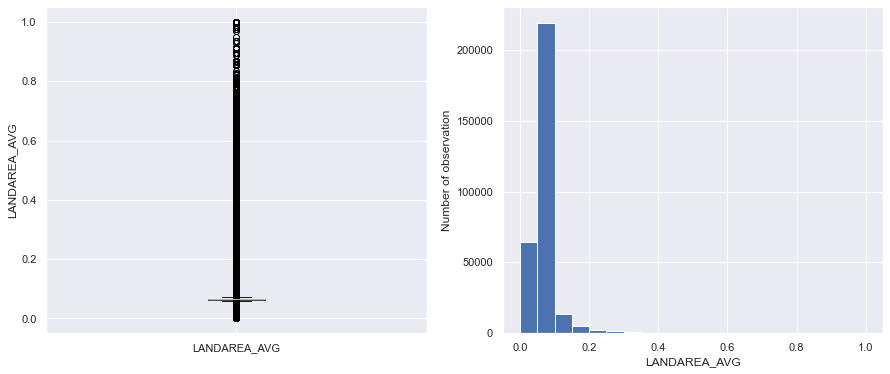

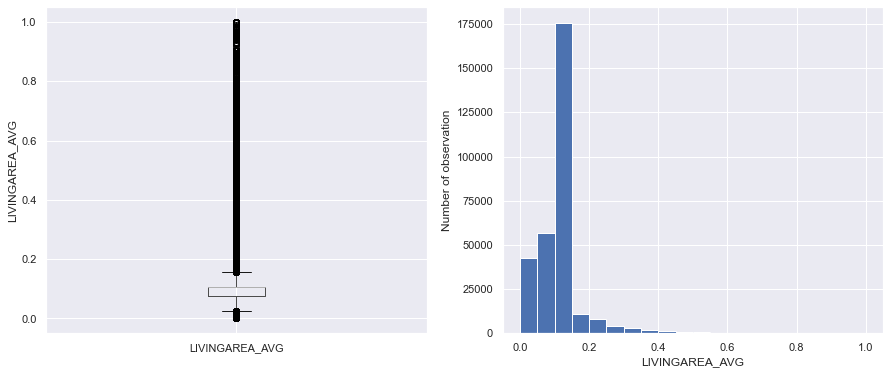

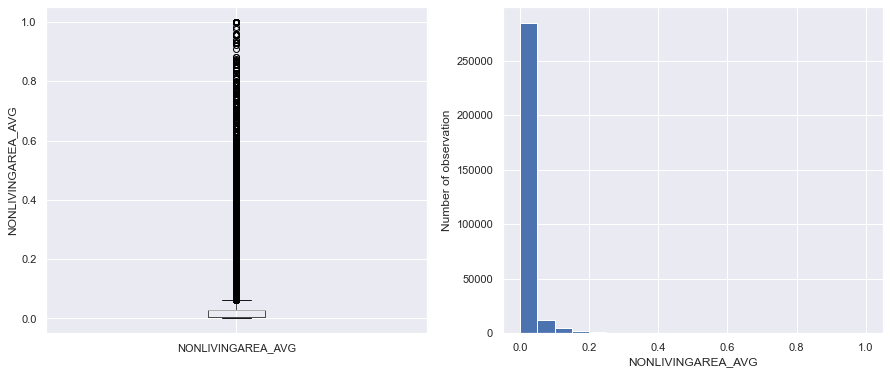

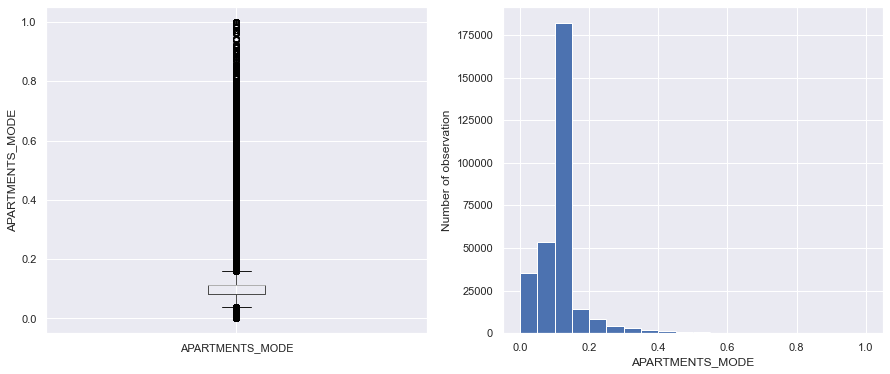

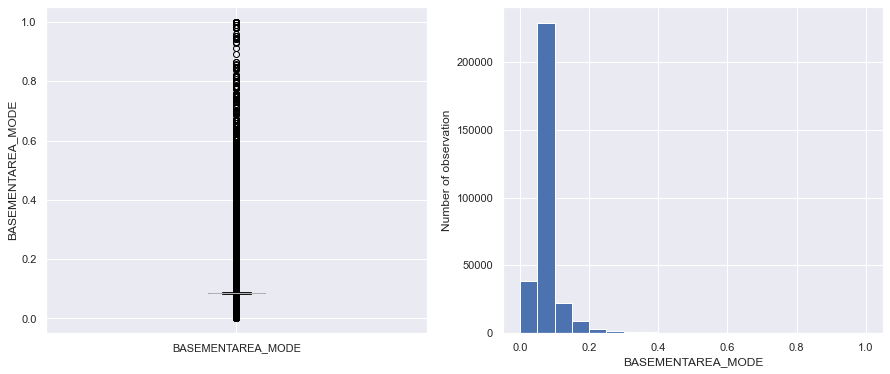

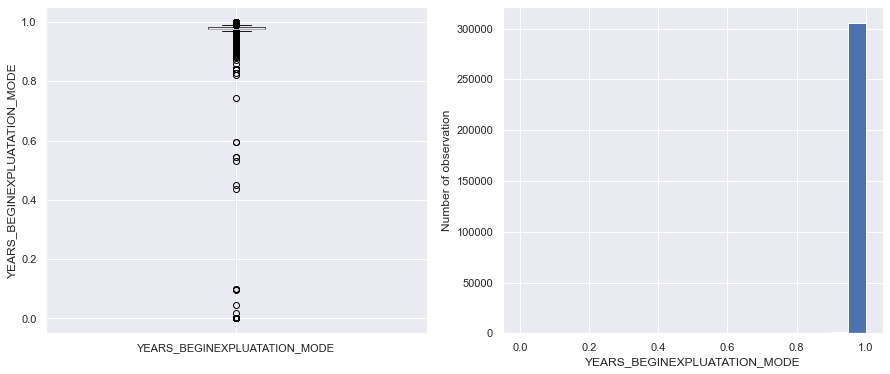

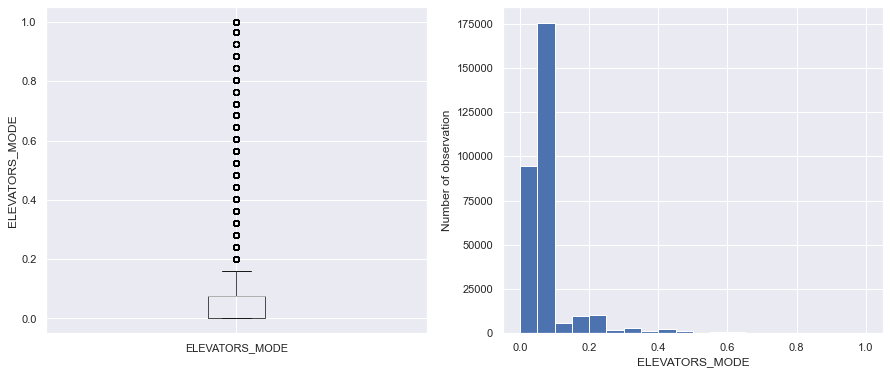

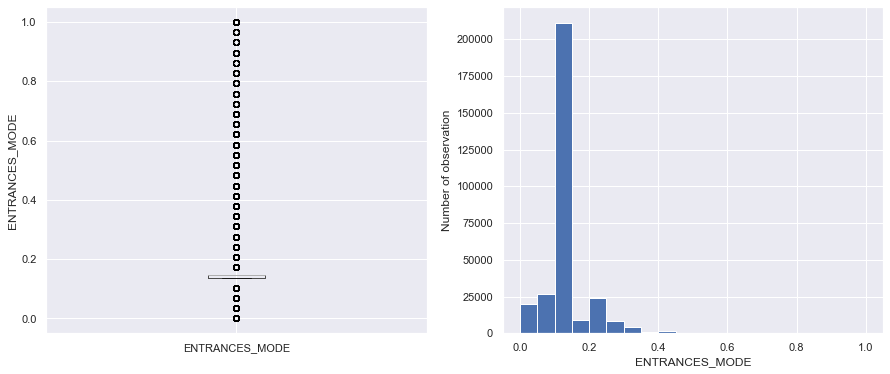

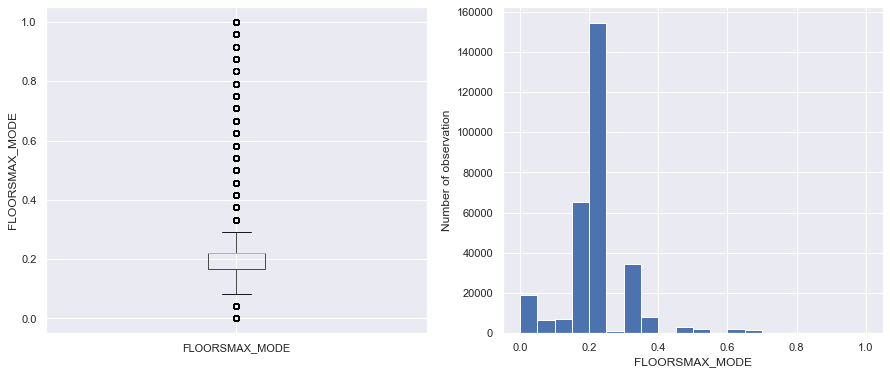

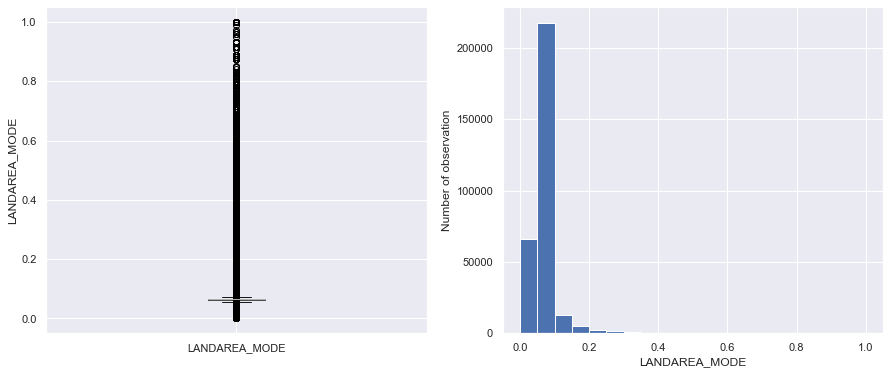

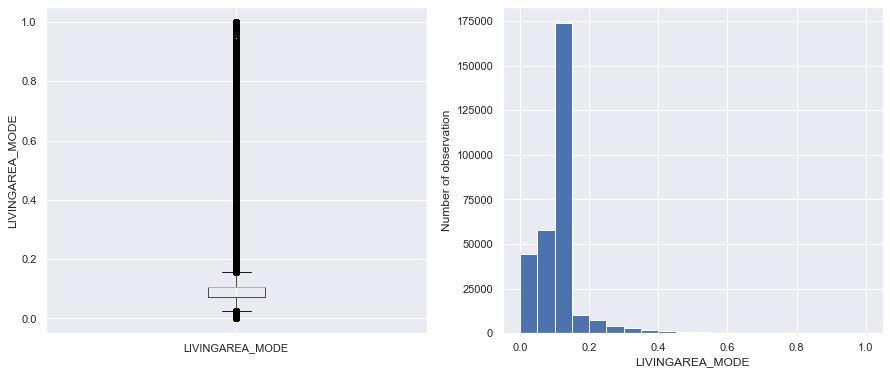

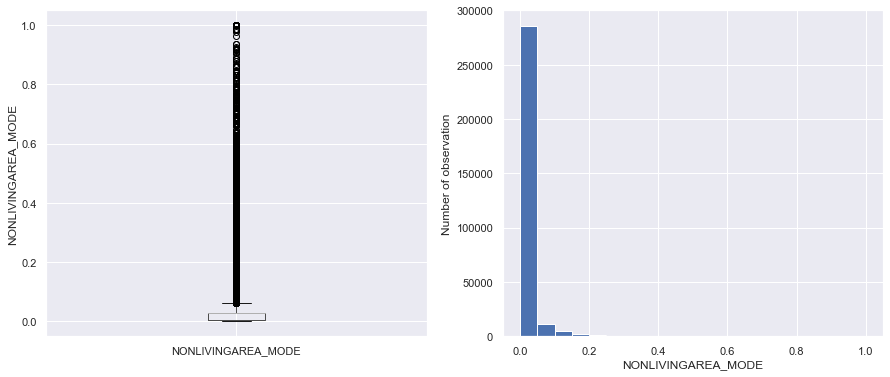

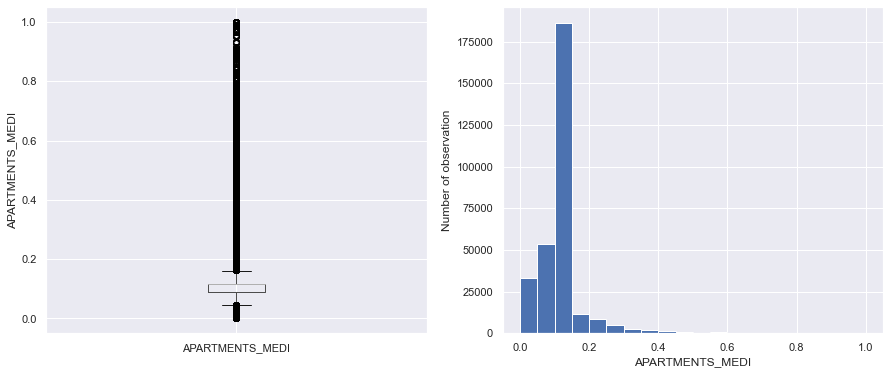

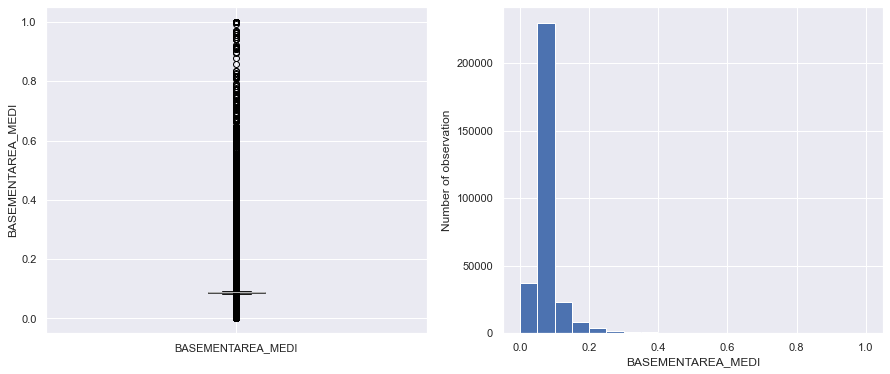

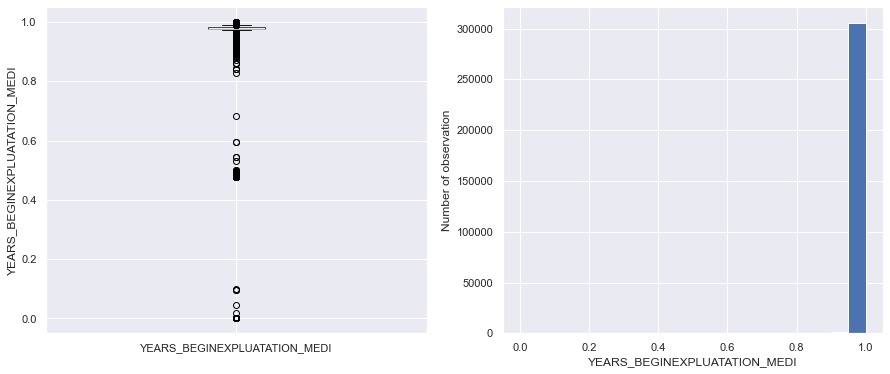

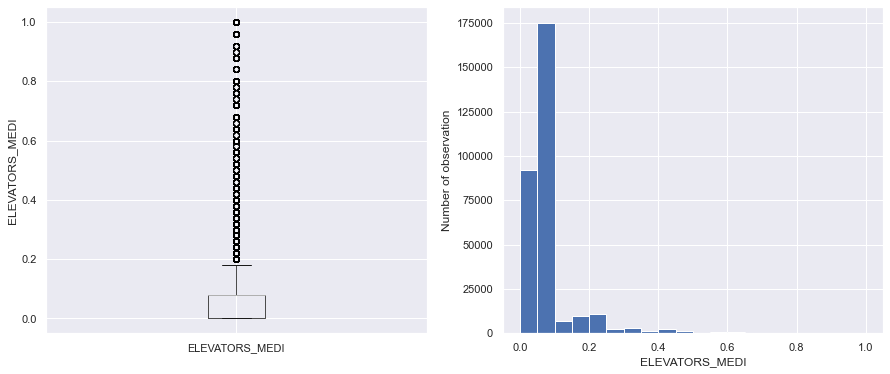

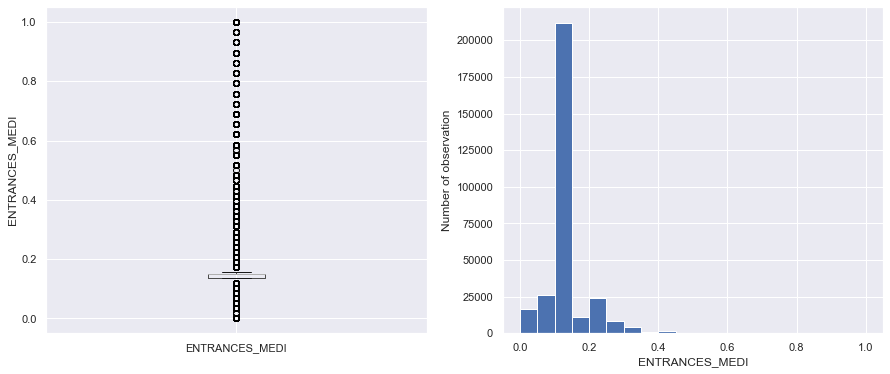

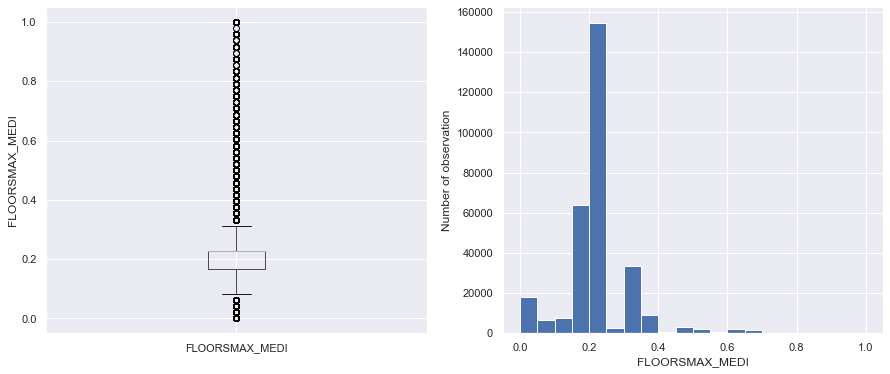

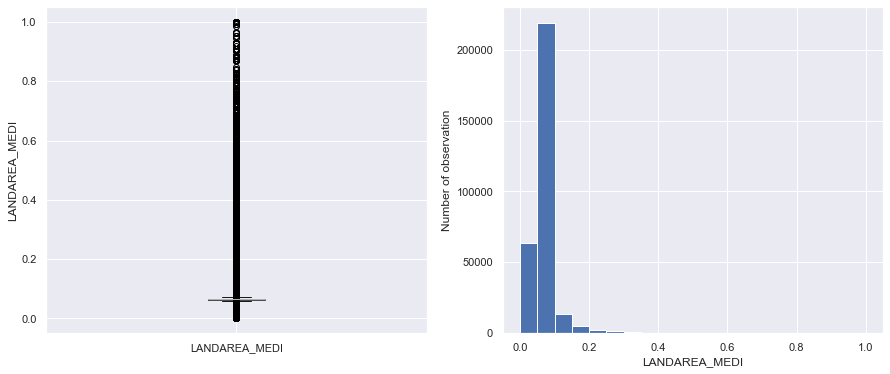

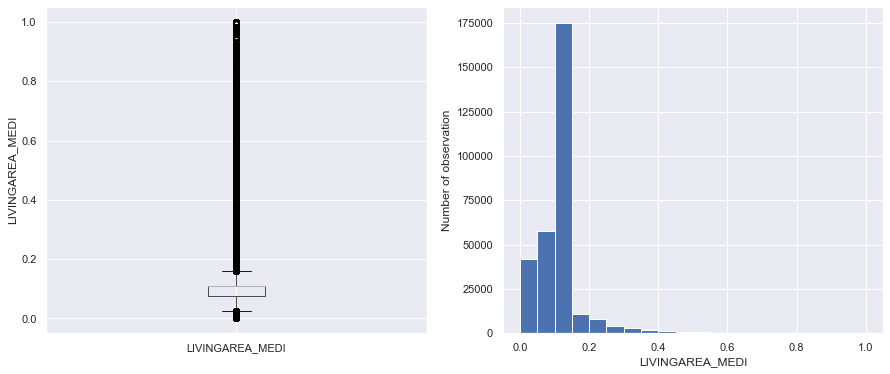

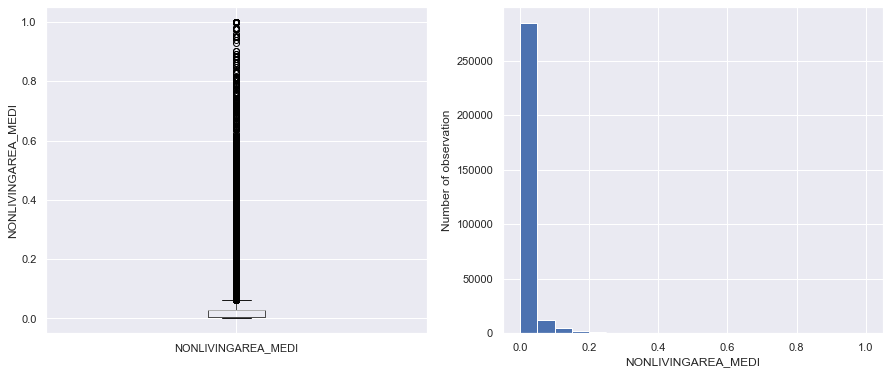

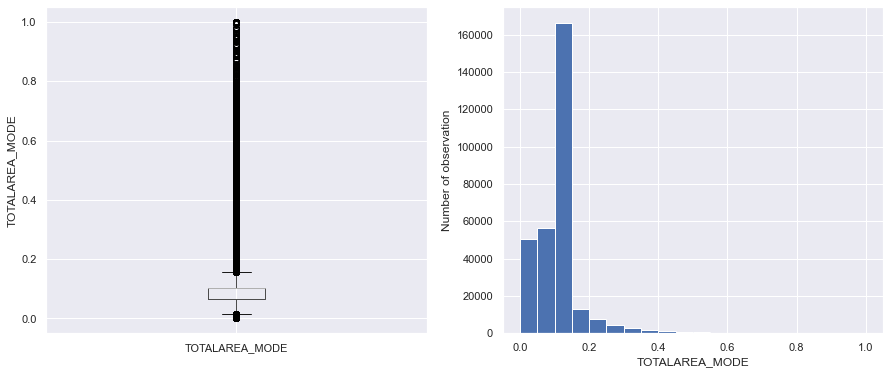

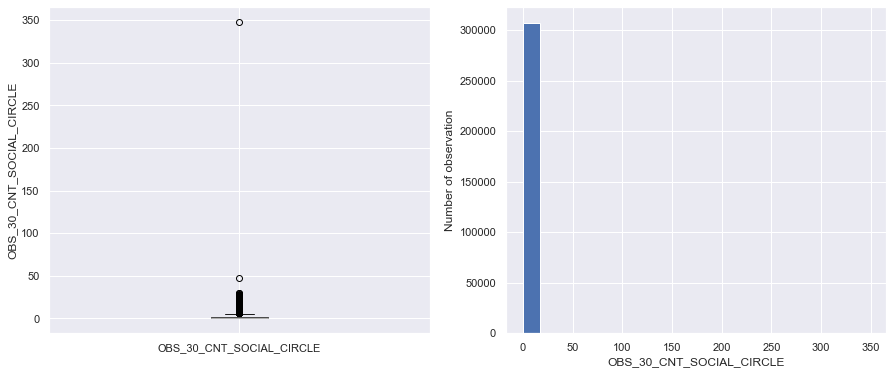

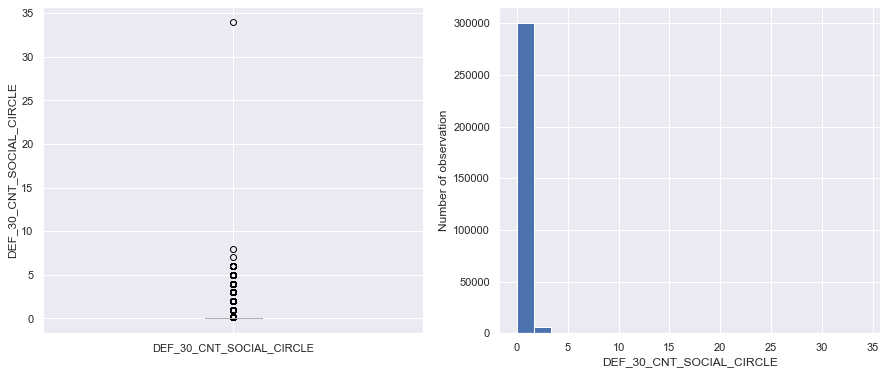

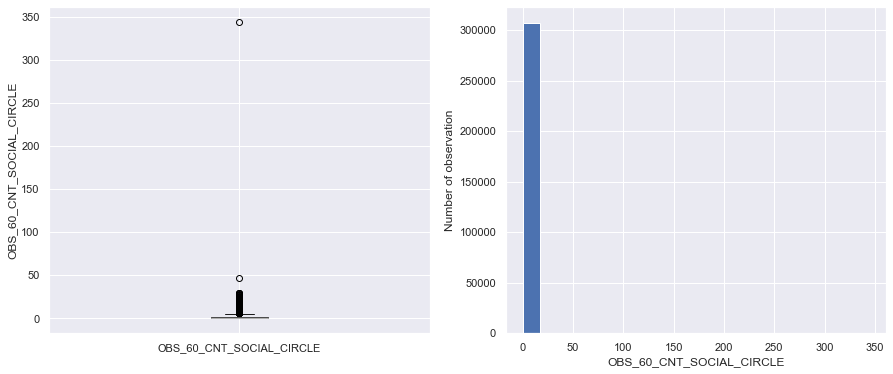

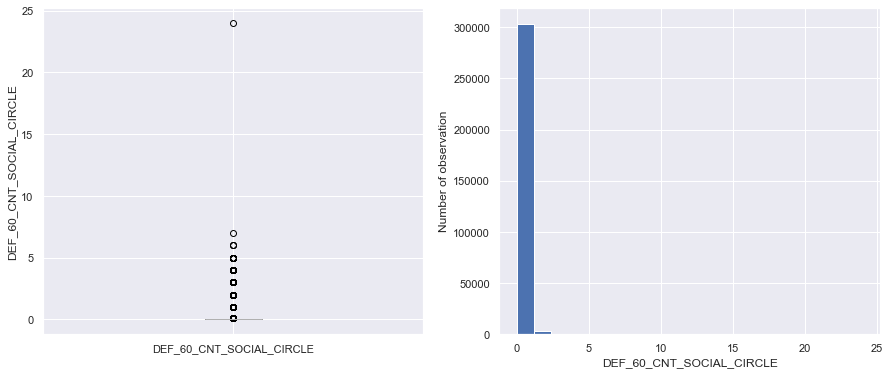

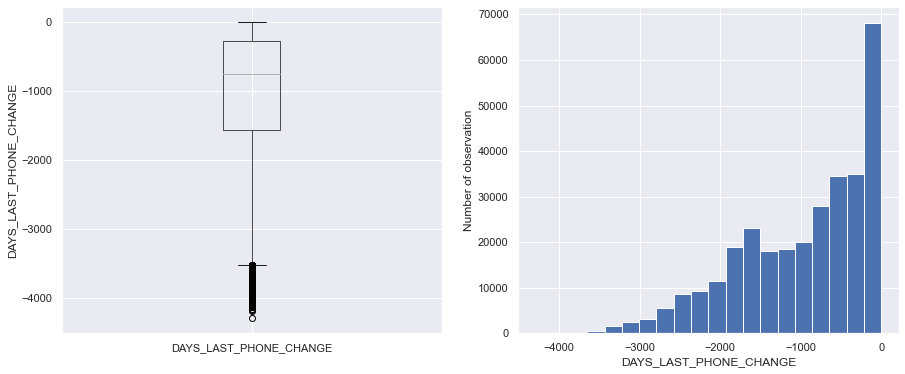

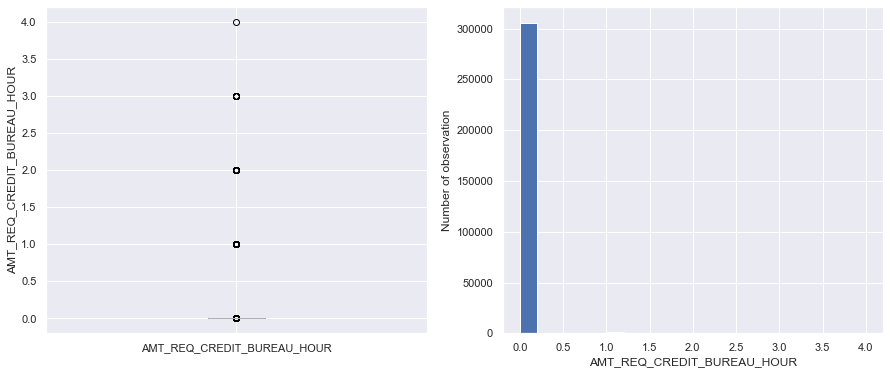

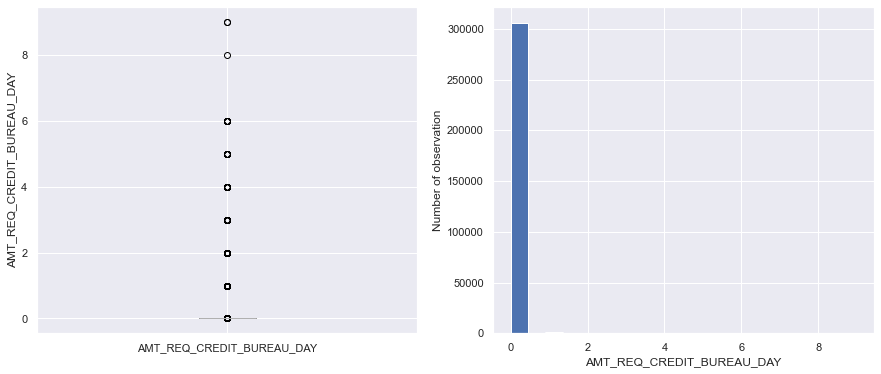

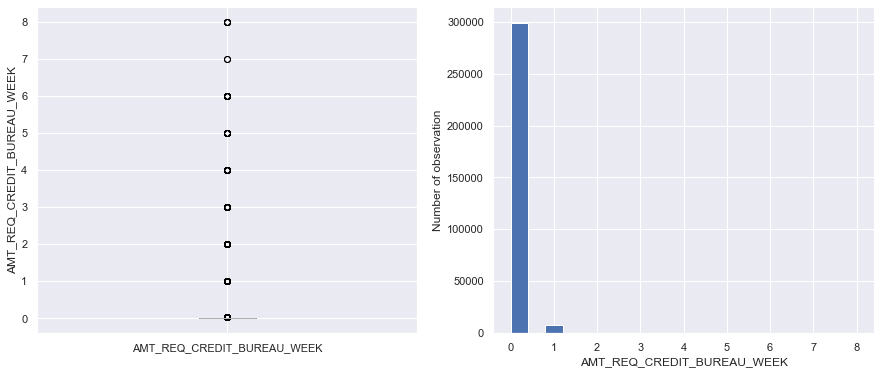

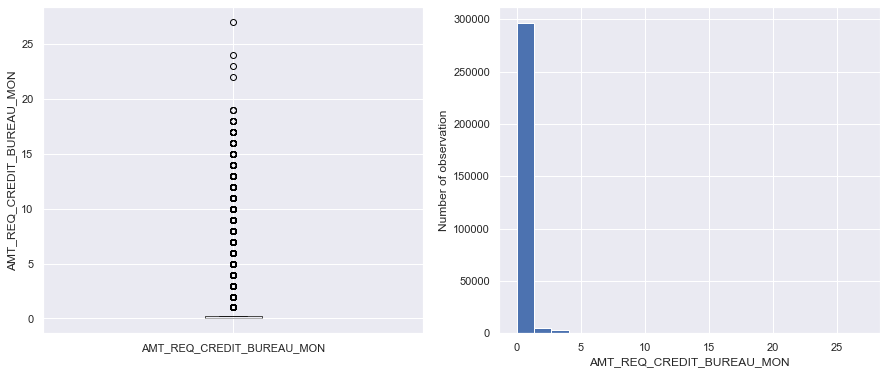

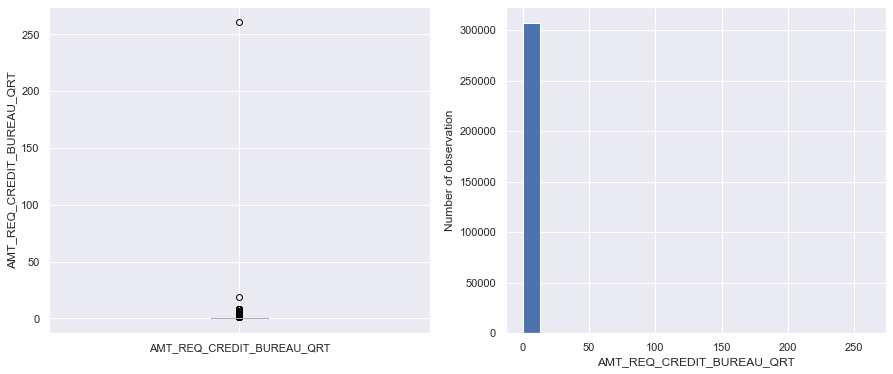

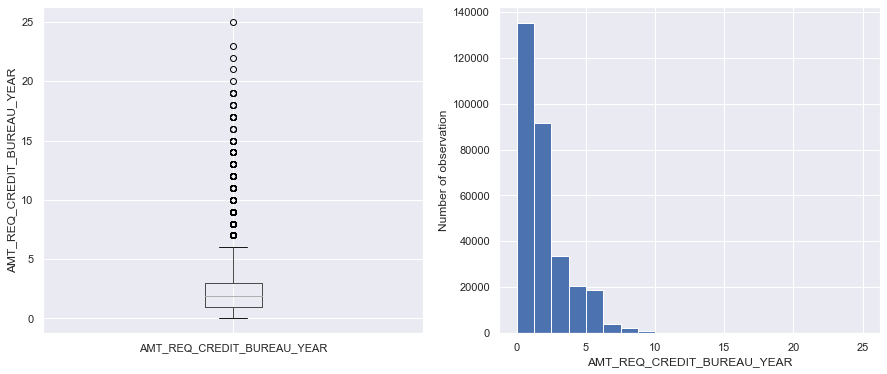

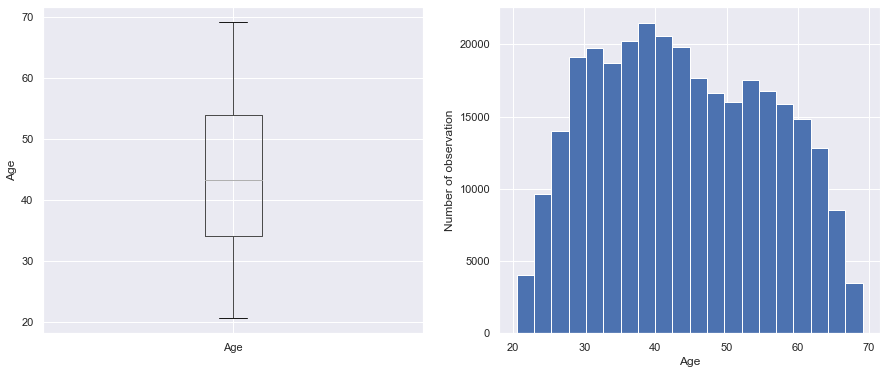

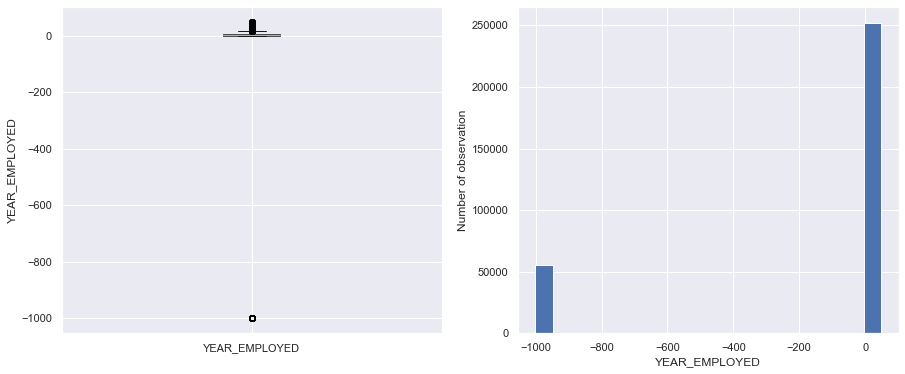

In [48]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of observation')
    fig.set_xlabel(var)

    plt.show()

In [49]:
data['CODE_GENDER']=data['CODE_GENDER'].replace('XNA','Unknown_Gender')

In [50]:
data['CODE_GENDER'].unique()

array(['M', 'F', 'Unknown_Gender'], dtype=object)

### Encode my categorical columns values

In [51]:
for var in categorical:
    print("'{}' has {} labels".format(var,len(data[var].unique())))

'NAME_CONTRACT_TYPE' has 2 labels
'CODE_GENDER' has 3 labels
'FLAG_OWN_CAR' has 2 labels
'FLAG_OWN_REALTY' has 2 labels
'NAME_TYPE_SUITE' has 8 labels
'NAME_INCOME_TYPE' has 8 labels
'NAME_EDUCATION_TYPE' has 5 labels
'NAME_FAMILY_STATUS' has 6 labels
'NAME_HOUSING_TYPE' has 6 labels
'OCCUPATION_TYPE' has 19 labels
'WEEKDAY_APPR_PROCESS_START' has 7 labels
'ORGANIZATION_TYPE' has 58 labels
'HOUSETYPE_MODE' has 4 labels
'WALLSMATERIAL_MODE' has 8 labels
'EMERGENCYSTATE_MODE' has 3 labels


In [52]:
data=data.drop(['ORGANIZATION_TYPE'],axis=1)
categorical.remove('ORGANIZATION_TYPE')

In [53]:
for var in categorical:
    if len(data[var].unique())>2:
        nts=pd.get_dummies(data[var],drop_first=True)
        data=pd.concat([data,nts],axis=1)
        data= data.drop([var],axis=1)
        
    else :
        data[var]=pd.get_dummies(data[var],drop_first=True)
       
        
        
        

In [54]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WEDNESDAY,specific housing,terraced house,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Yes
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,1,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,1,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


### Scaling of columns with raw data which  varies widely

In [55]:
#put the value of our continuous variables between 0 and 1 by using min max scaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))

for var in continuous:
    data[[var]]=scaler.fit_transform(data[[var]])
    


In [56]:
data.shape

(307511, 154)

In [57]:
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WEDNESDAY,specific housing,terraced house,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,Yes
0,0.000000,1,0,0,1,0.000000,0.001512,0.090287,0.090032,0.077441,...,1,0,0,0,0,0,0,1,0,0
1,0.000003,0,0,0,0,0.000000,0.002089,0.311736,0.132924,0.271605,...,0,0,0,0,0,0,0,0,0,0
2,0.000006,0,1,1,1,0.000000,0.000358,0.022472,0.020025,0.023569,...,0,0,0,0,0,0,0,0,0,0
3,0.000011,0,0,0,1,0.000000,0.000935,0.066837,0.109477,0.063973,...,1,0,0,0,0,0,0,0,0,0
4,0.000014,0,0,0,1,0.000000,0.000819,0.116854,0.078975,0.117845,...,0,0,0,0,0,0,0,0,0,0
5,0.000017,0,0,0,1,0.000000,0.000627,0.111235,0.101018,0.103255,...,1,0,0,0,0,0,0,0,0,0
6,0.000020,0,0,1,1,0.052632,0.001243,0.378458,0.154774,0.337823,...,0,0,0,0,0,0,0,0,0,0
7,0.000022,0,0,1,1,0.000000,0.002858,0.370787,0.157792,0.371493,...,0,0,0,0,0,0,0,0,0,0
8,0.000025,0,0,0,1,0.000000,0.000742,0.243348,0.125623,0.217733,...,1,0,0,0,0,0,0,0,0,0
9,0.000028,0,1,0,1,0.000000,0.000935,0.089888,0.072675,0.090909,...,0,0,0,0,0,0,0,0,0,0


# SEPARATE TRAIN TEST SET

In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [59]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import plot_confusion_matrix

In [60]:
X=data.loc[:, data.columns != 'TARGET']
X=X.drop(['SK_ID_CURR'],axis=1)

In [61]:
Y=data['TARGET']
Y.unique()

array([1, 0], dtype=int64)

In [62]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((246008, 152), (61503, 152))

# MODEL TRAINNING AND PREDICTION

### Xgboost Classifier

In [63]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb = xgb.XGBClassifier(scale_pos_weight=11,objective="binary:logistic",learning_rate= 0.001, n_estimators= 100)
xgb.fit(X_train, Y_train)

C:\Users\Hassan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:34:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=11, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [64]:
y_pred=xgb.predict(X_test)
y_pred_auc = xgb.predict_proba(X_test)[:,1]

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

roc_score = roc_auc_score(Y_test,y_pred_auc)
print("roc_auc_score: ",roc_score)

acc_score = accuracy_score(Y_test, y_pred)
print("Accuracy_score",acc_score)

roc_auc_score:  0.7208296506103602
Accuracy_score 0.6584069069801473


In [66]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.66      0.78     56554
           1       0.15      0.66      0.24      4949

    accuracy                           0.66     61503
   macro avg       0.55      0.66      0.51     61503
weighted avg       0.89      0.66      0.74     61503



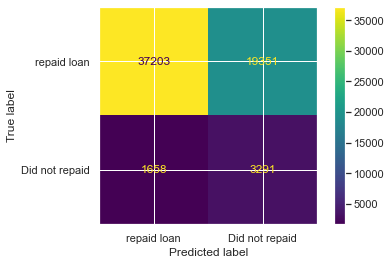

In [67]:
plot_confusion_matrix(xgb,
                       X_test,
                       Y_test,
                       values_format='d',
                       display_labels=['repaid loan' ,'Did not repaid'])

### RandomForest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 100, random_state = 50, n_jobs = -1,class_weight="balanced")
RF.fit(X_train,Y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=50)

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

y_pred=RF.predict(X_test)
y_pred_auc =RF.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(Y_test,y_pred_auc)
print("roc_auc_score: ",roc_score)

acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy_score: ",acc_score)

roc_auc_score:  0.7235222671896981
Accuracy_score:  0.9196136773815912


In [70]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.69      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.81      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503



### GradientBossting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier


In [72]:
GB = GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)
GB.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [73]:
y_pred=GB.predict(X_test)
y_pred_auc = GB.predict_proba(X_test)[:,1]

roc_score = roc_auc_score(Y_test,y_pred_auc)
print("roc_auc_score: ",roc_score)

acc_score = accuracy_score(Y_test,y_pred)
print("Accuracy_score: ",acc_score)

roc_auc_score:  0.7139475370067613
Accuracy_score:  0.9195323805342829


# MLFLOW

#### MLFLOW On xgboost

In [74]:
import xgboost as xgb
from xgboost import XGBClassifier
from mlflow.utils.environment import _mlflow_conda_env
import os
import warnings
import sys
import mlflow
import mlflow.xgboost
from sklearn.metrics import accuracy_score

def train_xgboost(lr, n_estim):
    
    with mlflow.start_run(run_name='xgboost'):
               
        xgb =XGBClassifier(learning_rate= lr, n_estimators= n_estim, seed= 42, subsample= 1, colsample_bytree= 1,objective= 'binary:logistic',max_depth= 3,scale_pos_weight=11)
        xgb.fit(X_train, Y_train)
        mlflow.xgboost.autolog()
        
        y_pred_auc = xgb.predict_proba(X_test)[:,1]
        y_pred = xgb.predict(X_test)

       
        roc = roc_auc_score(Y_test, y_pred_auc)*100
        acc = accuracy_score(Y_test,y_pred)
       
        mlflow.log_metric("auc_roc",roc)
        mlflow.log_metric("accuracy_score",acc)
       
        
        mlflow.log_param('learning_rate', lr)
        mlflow.log_param('n_estimators', n_estim)
        mlflow.log_param('seed', 0)
        mlflow.log_param('subsample', 1)
        mlflow.log_param('colsamples_bytree', 1)
        mlflow.log_param('objective','binary:logistic')
        mlflow.log_param('max_depth', 3)
        mlflow.log_param('scale_pos_weight', 11)


        #log model
        mlflow.xgboost.log_model(xgb, "model")
        print("roc_auc",roc)
        print("accuracy_score",acc)
        

#### MLFLOW ON Random Forest 

In [75]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def train_random(numb_est):
     with mlflow.start_run(run_name='random forest'):
        
      
        RF = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1,class_weight="balanced")
        RF.fit(X_train,Y_train)
      
        mlflow.xgboost.autolog()
      
        
        y_pred_auc = RF.predict_proba(X_test)[:,1]
        y_pred = RF.predict(X_test)
        
      
       
       
        roc_auc = roc_auc_score(Y_test, y_pred_auc)*100
        acc = accuracy_score(Y_test,y_pred)
        
        
        mlflow.log_metric("auc_roc",roc_auc)
        mlflow.log_metric("accuracy_score",acc)
        
       
        
       
        mlflow.log_param('n_estimators', numb_est)
        mlflow.log_param('random_state', 50)
        mlflow.log_param('verbose', 1)
        mlflow.log_param('n_jobs', -1)
        mlflow.log_param('class_weight','balanced')
        


        # log model
        mlflow.sklearn.log_model(RF, "model")
        print("roc_auc",roc_auc)
        print("accuracy_score",acc)

#### MLFLOW ON GradientBoosting 

In [76]:
import mlflow.sklearn
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


def train_GB(lr, numb_est):
    with mlflow.start_run(run_name ='GrandientBoosting'):
        
        
        gbc = GradientBoostingClassifier(learning_rate = lr, n_estimators = numb_est, random_state=50)
        gbc.fit(X_train, Y_train)
      
        mlflow.xgboost.autolog()
      
        
        y_pred_auc = gbc.predict_proba(X_test)[:,1]
        y_pred = gbc.predict(X_test)

      
       
       
        roc = roc_auc_score(Y_test, y_pred_auc)*100
        acc = accuracy_score(Y_test,y_pred)
        
        
        mlflow.log_metric("auc_roc",roc)
        mlflow.log_metric("accuracy_score",acc)
        
       
        
        mlflow.log_param('learning_rate', lr)
        mlflow.log_param('n_estimators', numb_est)
        mlflow.log_param('random_state', 50)
        
        
        


        # log model
        mlflow.sklearn.log_model(gbc, "model")
        print("roc_auc",roc)
        print("accuracy_score",acc)

In [77]:
train_xgboost(0.0001,100)

C:\Users\Hassan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:47:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
roc_auc 68.51432316242357
accuracy_score 0.7316065882965058


In [78]:
train_random(100)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   52.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished


roc_auc 72.35222671896982
accuracy_score 0.9196136773815912


In [79]:
train_GB(0.01,50)

roc_auc 70.42350291750836
accuracy_score 0.9195323805342829


# MODEL EXPLAINATION

In [80]:
import shap
shap.initjs()

In [81]:
import eli5
eli5.show_weights(GB)

Weight,Feature
0.4989 ± 0.1906,x29
0.4371 ± 0.1421,x28
0.0353 ± 0.1553,x27
0.0133 ± 0.0734,x91
0.0092 ± 0.0604,x89
0.0029 ± 0.0301,x106
0.0015 ± 0.0149,x7
0.0009 ± 0.0106,x84
0.0003 ± 0.0073,x5
0.0002 ± 0.0062,x64


In [82]:
rand = X_train.sample(1000, random_state=42)

In [83]:
explainer = shap.TreeExplainer(GB)

In [84]:
shap_values = explainer.shap_values(rand)

In [85]:
feature_names=X_train.columns.tolist()

In [86]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


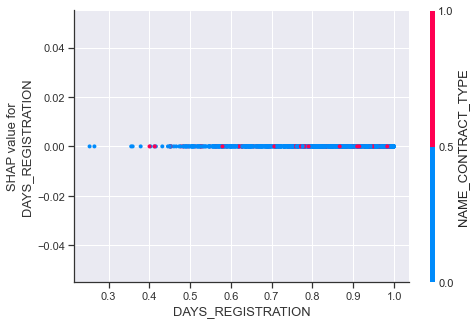

In [88]:
shap.dependence_plot("DAYS_REGISTRATION", shap_values, rand)

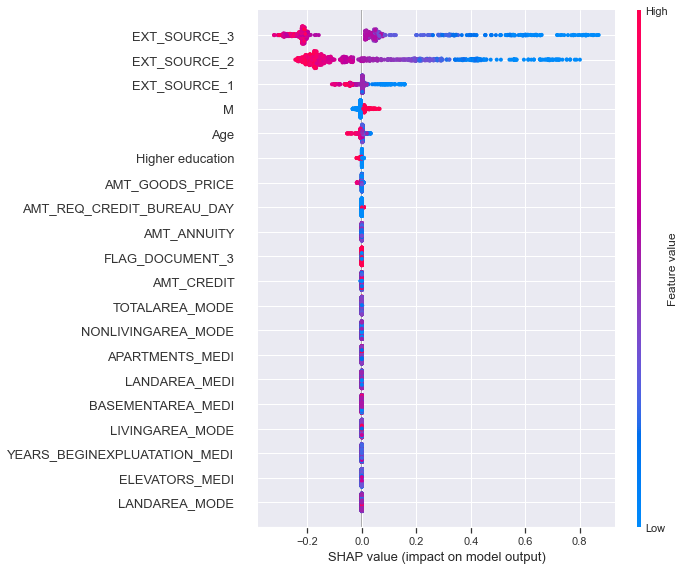

In [89]:
shap.summary_plot(shap_values, rand,feature_names= feature_names)

In [90]:
pip install math

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


In [91]:
get_ipython().run_line_magic('matplotlib', 'inline')